In [2]:
import pandas as pd
from nltk.probability import FreqDist

## Read the anonymizrd dataframe

In [3]:
df = pd.read_parquet('/Users/saravana/Documents/Work/Master-Thesis/reclamation-processing/data/export_anonymized_features_2016_2020.parquet.gzip')

pd.set_option('display.max_columns', None)
display(df.head())

,anonymized_band,anonymized_promoter,anonymized_venue,tarif_bez,vg_state,vg_datum_season,vg_datum_month,vg_datum_day_of_week,vg_datum_year,vg_datum_von,veranst_segment,vg_inkasso
ID,,,,,,,,,,,,
9938766,Klapp Dehmel AG & Co. OHG,Wiek Löchel AG,turnhalle,U-K (MUSIKER),BAVARIA,0,1,5,0,2014-02-08,2,210.00
9939272,Karz Ritter KGaA,Peukert Neuschäfer GmbH,grundschule,U-V II. 1 (+II 2),THURINGIA,0,1,5,0,2014-02-22,1,85.06
9939279,Klemm Ullrich OHG mbH,Naser Klemt KG,werk,U-V II. 1 (+II 2),BAVARIA,0,1,1,0,2014-02-18,1,90.20
9939280,Albers Klemt GmbH & Co. OHG,Patberg AG & Co. KG,kulturhaus,U-V II. 1 (+II 2),BAVARIA,1,2,5,0,2014-03-29,2,206.12
9939281,Albers Klemt GmbH & Co. OHG,Patberg AG & Co. KG,kulturhaus,U-V II. 1 (+II 2),BAVARIA,1,2,4,0,2014-03-21,2,206.12


## Featurize promoter - Get 30 most frequent promoters

,promoter_Schmidtke Reichmann GmbH & Co. KG,promoter_Heintze AG & Co. KG,promoter_Drubin GmbH,promoter_Textor KG,promoter_Schleich Stiftung & Co. KG,promoter_Fiebig Weinhage AG & Co. KGaA,promoter_Zobel Carsten GbR,promoter_Finke Hethur e.G.,promoter_Fröhlich Sölzer GmbH,promoter_Seip Scholtz GmbH,promoter_Margraf Dörr AG & Co. KG,promoter_Bolzmann Caspar GmbH & Co. OHG,promoter_Franke Franke AG,promoter_Sontag GmbH & Co. OHG,promoter_Wesack Riehl GmbH & Co. KG,promoter_Röhrdanz,promoter_Juncken Eckbauer e.V.,promoter_Gutknecht Fechner AG,promoter_Knappe AG,promoter_Flantz Kensy GmbH & Co. OHG,promoter_Kohl Kabus AG & Co. KG,promoter_Gunpf Hertrampf OHG mbH,promoter_Förster van der Dussen AG & Co. KG,promoter_Mude Eckbauer GmbH,promoter_Metz OHG mbH,promoter_Franke Langern Stiftung & Co. KG,promoter_Biggen Hermann AG & Co. OHG,promoter_Wähner Haase GmbH & Co. KG,promoter_Dippel Koch KG,promoter_Kitzmann AG
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


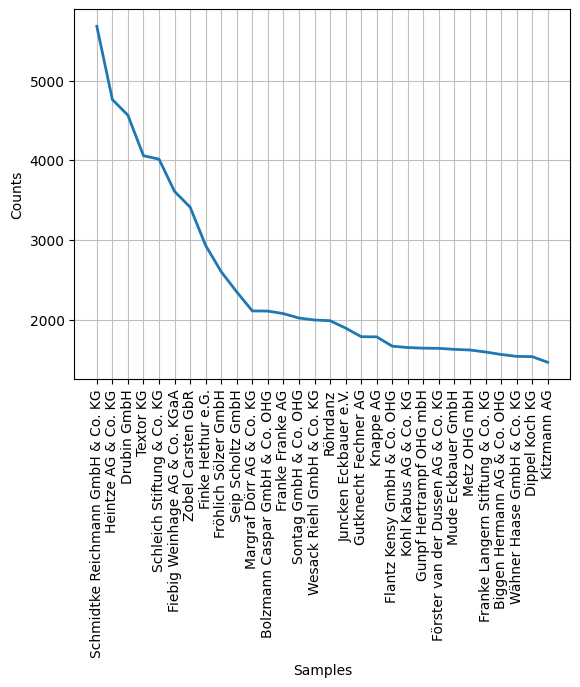

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [4]:
flat_list_promoters = [item for item in df['anonymized_promoter']]
fdist_promoters = FreqDist(flat_list_promoters)
most_common_promoters = [i[0] for i in fdist_promoters.most_common(30)]
df_featurize_promoters = pd.DataFrame(df['anonymized_promoter'])

for term in most_common_promoters :
    df_featurize_promoters['promoter_'+term]=df_featurize_promoters['anonymized_promoter'].apply(lambda x: 1 if term in x else 0)

df_featurize_promoters = df_featurize_promoters.drop(['anonymized_promoter'], axis=1)

display(df_featurize_promoters.head(10))
fdist_promoters.plot(30,cumulative=False)

## Featurize band - Get 30 most frequent bands

,band_Hofmann Ortmann AG,band_Christoph Löffler AG,band_Margraf Döring GbR,band_Huhn Trüb AG & Co. OHG,band_Finke Haering AG,band_Pergande Neuschäfer AG,band_Hornig Täsche OHG mbH,band_Ziegert Scheel AG,band_Adolph Heser GmbH & Co. OHG,band_Hübel Eckbauer AG,band_Kensy Gute GmbH & Co. KGaA,band_Ring Flantz Stiftung & Co. KG,band_Wende Scheuermann GmbH & Co. KG,band_Pärtzelt Bolnbach KG,band_Bachmann Ernst KG,band_Hamann Hethur Stiftung & Co. KGaA,band_Nohlmans Roskoth e.V.,band_Schönland Koch II AG,band_Hermighausen Süßebier GmbH,band_Juncken Briemer Stiftung & Co. KG,band_Lachmann Heinrich GmbH & Co. OHG,band_Hendriks Döring AG,band_Bähr Weihmann AG,band_Beer Reising AG,band_Stumpf Ritter GmbH & Co. KGaA,band_Thies Stiebitz GbR,band_Bärer Jungfer GmbH & Co. KG,band_Trubin Butte e.G.,band_Römer Steckel GmbH & Co. KG,band_Wiek Schmiedt GmbH & Co. OHG
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


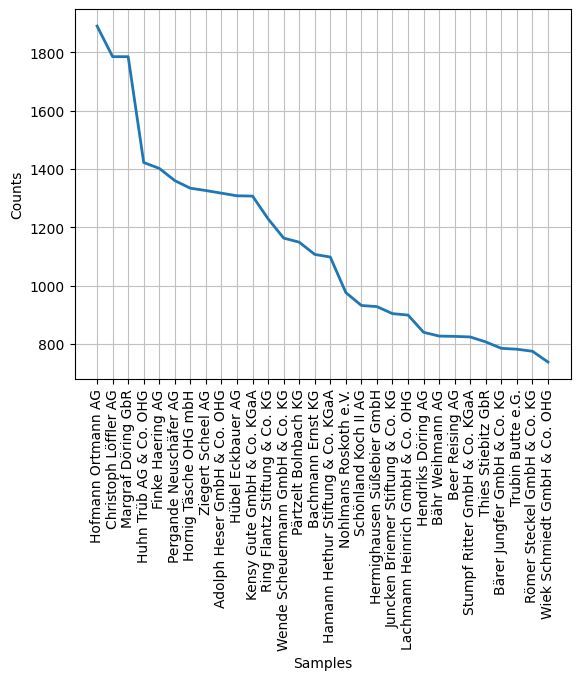

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [5]:
flat_list_bands = [item for item in df['anonymized_band']]
fdist_bands = FreqDist(flat_list_bands)
most_common_bands = [i[0] for i in fdist_bands.most_common(30)]
df_featurize_bands = pd.DataFrame(df['anonymized_band'])

for term in most_common_bands :
    df_featurize_bands['band_'+term]=df_featurize_bands['anonymized_band'].apply(lambda x: 1 if term in x else 0)

df_featurize_bands = df_featurize_bands.drop(['anonymized_band'], axis=1)

display(df_featurize_bands.head(10))
fdist_bands.plot(30,cumulative=False)

## Featurize venue - Get 30 most frequent venues

,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_kulturzentrum,place_gaststaette,place_buergerhaus,place_festhalle,place_stadthalle,place_festzelt,place_schloss,place_pub,place_restaurant,place_gasthaus,place_bar,place_kurhaus,place_kulturhaus,place_kabarett,place_rathaus,place_arena,place_gasthof,place_park,place_wandelhalle,place_schlachthof,place_turnhalle,place_staatsbad,place_zelt,place_mehrzweckhalle
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9939272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9939281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9939282,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


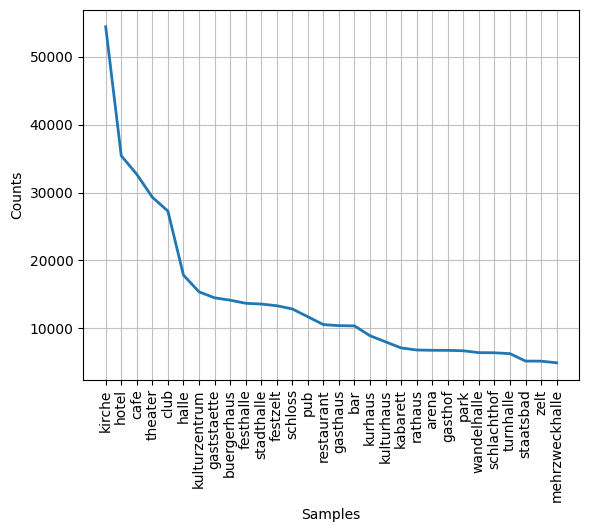

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [6]:
flat_list_venues = [item for item in df['anonymized_venue']]
fdist_venues = FreqDist(flat_list_venues)
most_common_venues = [i[0] for i in fdist_venues.most_common(30)]
df_featurize_venues = pd.DataFrame(df['anonymized_venue'])

for term in most_common_venues :
    df_featurize_venues['place_'+term]=df_featurize_venues['anonymized_venue'].apply(lambda x: 1 if term in x else 0)

df_featurize_venues = df_featurize_venues.drop(['anonymized_venue'], axis=1)

display(df_featurize_venues.head(10))
fdist_venues.plot(30,cumulative=False)

## Featurize Tarif - Get 30 most frequent tariffs

,tarif_U-V II. 1 (+II 2),tarif_U-K (MUSIKER),tarif_U-K (MUSIKER) MINDESTVERGUETUNG,tarif_U-ST I. (MUSIKER),tarif_U-K I (+ II 2B) - MIT SONSTIGEM GELDWERTEN VORTEIL,tarif_U-ST I (MUSIKER) NL,tarif_U-V III. 1,tarif_U-V III. 2,tarif_U-K III. 2D) (MUSIKER) - VOR GELADENEN GAESTEN,tarif_VARIETE I (MUSIKER),tarif_U-V VI. B,tarif_E (MUSIKER),tarif_P-K I. (U-MUSIK),tarif_U-K II. (MUSIKER) BIS 50 MIN,tarif_U-K II. (MUSIKER) BIS 20 MIN,tarif_E-P,tarif_U-K II. (MUSIKER) BIS 25 MIN,tarif_U-K II. (MUSIKER) BIS 15 MIN,tarif_U-K II. (MUSIKER) BIS 30 MIN,tarif_U-K II. (MUSIKER) BIS 10 MIN,tarif_U-ST (MUSIKER),tarif_CHORVERBAND KONZERT U-MUSIK,tarif_VK I 3 ZIRKUSUNTERNEHMEN (MUSIKER),tarif_U-K II. (MUSIKER) BIS 5 MIN,tarif_U-K II. (MUSIKER) BIS 35 MIN,tarif_U-K II. (MUSIKER) BIS 40 MIN,tarif_P-K I. (E-MUSIK),tarif_U-K II (MUSIKER) MINDESTVERGUETUNG,tarif_U-K II. (MUSIKER) BIS 45 MIN,tarif_U-V VI. B MINDESTVERGUETUNG
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


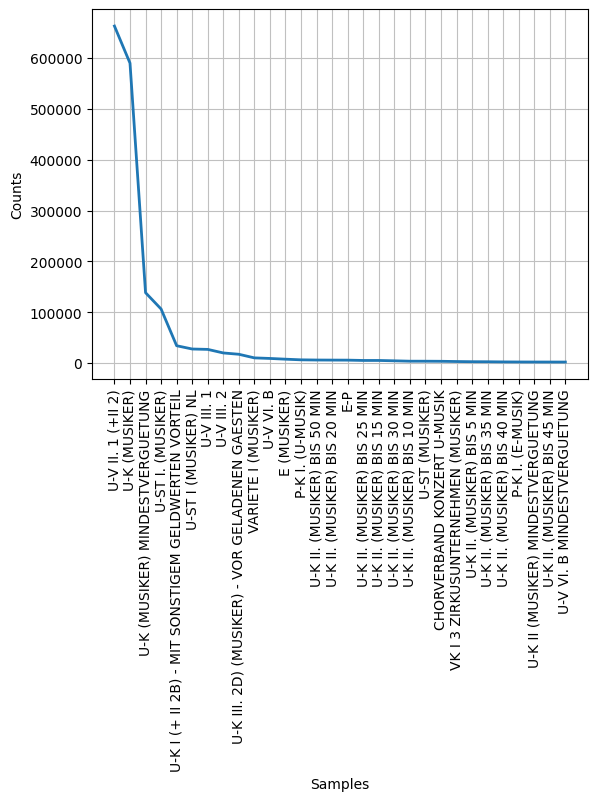

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [7]:
flat_list_tarifs = [item for item in df['tarif_bez']]
fdist_tarifs = FreqDist(flat_list_tarifs)
most_common_tarifs = [i[0] for i in fdist_tarifs.most_common(30)]
df_featurize_tarifs = pd.DataFrame(df['tarif_bez'])

for term in most_common_tarifs :
    df_featurize_tarifs['tarif_'+term]=df_featurize_tarifs['tarif_bez'].apply(lambda x: 1 if term in x else 0)

df_featurize_tarifs = df_featurize_tarifs.drop(['tarif_bez'], axis=1)

display(df_featurize_tarifs.head(10))
fdist_tarifs.plot(30,cumulative=False)

## Featurize state - Get 30 most frequent states

,state_BAVARIA,state_BADEN-WUERTTEMBERG,state_NORTH RHINE-WESTPHALIA,state_HESSE,state_LOWER SAXONY,state_BERLIN,state_RHINELAND-PALATINATE,state_SAXONY,state_HAMBURG,state_THURINGIA,state_SCHLESWIG-HOLSTEIN,state_BRANDENBURG,state_SAXONY-ANHALT,state_MECKLENBURG-WESTERN POMERANIA,state_SAARLAND,state_BREMEN
ID,,,,,,,,,,,,,,,,
9938766,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9939279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


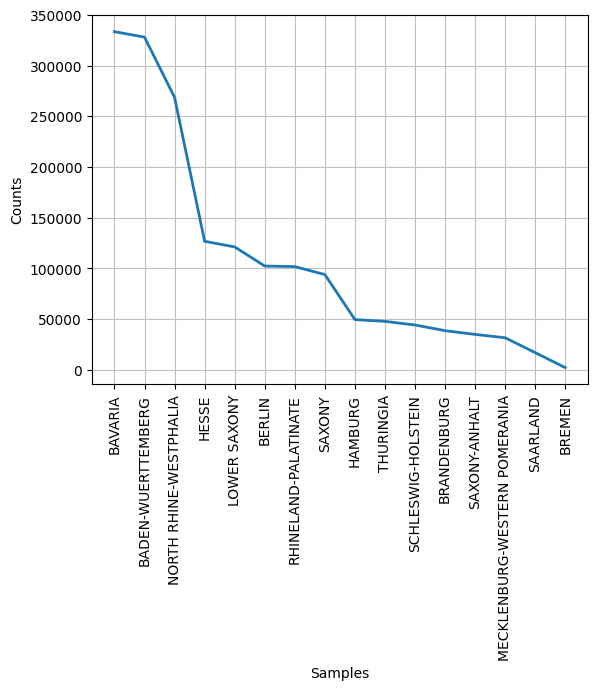

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [8]:
flat_list_states = [item for item in df['vg_state']]
fdist_states = FreqDist(flat_list_states)
most_common_states = [i[0] for i in fdist_states.most_common(30)]
df_featurize_states = pd.DataFrame(df['vg_state'])

for term in most_common_states :
    df_featurize_states['state_'+term]=df_featurize_states['vg_state'].apply(lambda x: 1 if term in x else 0)

df_featurize_states = df_featurize_states.drop(['vg_state'], axis=1)

display(df_featurize_states.head(10))
fdist_states.plot(30,cumulative=False)

## Merge all the features into single dataframe

In [9]:
all_features_df = df.merge(df_featurize_venues, how='left', on='ID')
all_features_df = all_features_df.merge(df_featurize_tarifs, how='left', on='ID')
all_features_df = all_features_df.merge(df_featurize_states, how='left', on='ID')
all_features_df = all_features_df.merge(df_featurize_bands, how='left', on='ID')
all_features_df = all_features_df.merge(df_featurize_promoters, how='left', on='ID')

all_features_df=all_features_df.rename(str.lower, axis='columns')

In [10]:
display(all_features_df.head(5))

,anonymized_band,anonymized_promoter,anonymized_venue,tarif_bez,vg_state,vg_datum_season,vg_datum_month,vg_datum_day_of_week,vg_datum_year,vg_datum_von,veranst_segment,vg_inkasso,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_kulturzentrum,place_gaststaette,place_buergerhaus,place_festhalle,place_stadthalle,place_festzelt,place_schloss,place_pub,place_restaurant,place_gasthaus,place_bar,place_kurhaus,place_kulturhaus,place_kabarett,place_rathaus,place_arena,place_gasthof,place_park,place_wandelhalle,place_schlachthof,place_turnhalle,place_staatsbad,place_zelt,place_mehrzweckhalle,tarif_u-v ii. 1 (+ii 2),tarif_u-k (musiker),tarif_u-k (musiker) mindestverguetung,tarif_u-st i. (musiker),tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil,tarif_u-st i (musiker) nl,tarif_u-v iii. 1,tarif_u-v iii. 2,tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten,tarif_variete i (musiker),tarif_u-v vi. b,tarif_e (musiker),tarif_p-k i. (u-musik),tarif_u-k ii. (musiker) bis 50 min,tarif_u-k ii. (musiker) bis 20 min,tarif_e-p,tarif_u-k ii. (musiker) bis 25 min,tarif_u-k ii. (musiker) bis 15 min,tarif_u-k ii. (musiker) bis 30 min,tarif_u-k ii. (musiker) bis 10 min,tarif_u-st (musiker),tarif_chorverband konzert u-musik,tarif_vk i 3 zirkusunternehmen (musiker),tarif_u-k ii. (musiker) bis 5 min,tarif_u-k ii. (musiker) bis 35 min,tarif_u-k ii. (musiker) bis 40 min,tarif_p-k i. (e-musik),tarif_u-k ii (musiker) mindestverguetung,tarif_u-k ii. (musiker) bis 45 min,tarif_u-v vi. b mindestverguetung,state_bavaria,state_baden-wuerttemberg,state_north rhine-westphalia,state_hesse,state_lower saxony,state_berlin,state_rhineland-palatinate,state_saxony,state_hamburg,state_thuringia,state_schleswig-holstein,state_brandenburg,state_saxony-anhalt,state_mecklenburg-western pomerania,state_saarland,state_bremen,band_hofmann ortmann ag,band_christoph löffler ag,band_margraf döring gbr,band_huhn trüb ag & co. ohg,band_finke haering ag,band_pergande neuschäfer ag,band_hornig täsche ohg mbh,band_ziegert scheel ag,band_adolph heser gmbh & co. ohg,band_hübel eckbauer ag,band_kensy gute gmbh & co. kgaa,band_ring flantz stiftung & co. kg,band_wende scheuermann gmbh & co. kg,band_pärtzelt bolnbach kg,band_bachmann ernst kg,band_hamann hethur stiftung & co. kgaa,band_nohlmans roskoth e.v.,band_schönland koch ii ag,band_hermighausen süßebier gmbh,band_juncken briemer stiftung & co. kg,band_lachmann heinrich gmbh & co. ohg,band_hendriks döring ag,band_bähr weihmann ag,band_beer reising ag,band_stumpf ritter gmbh & co. kgaa,band_thies stiebitz gbr,band_bärer jungfer gmbh & co. kg,band_trubin butte e.g.,band_römer steckel gmbh & co. kg,band_wiek schmiedt gmbh & co. ohg,promoter_schmidtke reichmann gmbh & co. kg,promoter_heintze ag & co. kg,promoter_drubin gmbh,promoter_textor kg,promoter_schleich stiftung & co. kg,promoter_fiebig weinhage ag & co. kgaa,promoter_zobel carsten gbr,promoter_finke hethur e.g.,promoter_fröhlich sölzer gmbh,promoter_seip scholtz gmbh,promoter_margraf dörr ag & co. kg,promoter_bolzmann caspar gmbh & co. ohg,promoter_franke franke ag,promoter_sontag gmbh & co. ohg,promoter_wesack riehl gmbh & co. kg,promoter_röhrdanz,promoter_juncken eckbauer e.v.,promoter_gutknecht fechner ag,promoter_knappe ag,promoter_flantz kensy gmbh & co. ohg,promoter_kohl kabus ag & co. kg,promoter_gunpf hertrampf ohg mbh,promoter_förster van der dussen ag & co. kg,promoter_mude eckbauer gmbh,promoter_metz ohg mbh,promoter_franke langern stiftung & co. kg,promoter_biggen hermann ag & co. ohg,promoter_wähner haase gmbh & co. kg,promoter_dippel koch kg,promoter_kitzmann ag
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,Klapp Dehmel AG & Co. OHG,Wiek Löchel AG,turnhalle,U-K (MUSIKER),BAVARIA,0,1,5,0,2014-02-08,2,210.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
all_features_df.columns

Index(['anonymized_band', 'anonymized_promoter', 'anonymized_venue',
       'tarif_bez', 'vg_state', 'vg_datum_season', 'vg_datum_month',
       'vg_datum_day_of_week', 'vg_datum_year', 'vg_datum_von',
       ...
       'promoter_kohl kabus ag & co. kg', 'promoter_gunpf hertrampf ohg mbh',
       'promoter_förster van der dussen ag & co. kg',
       'promoter_mude eckbauer gmbh', 'promoter_metz ohg mbh',
       'promoter_franke langern stiftung & co. kg',
       'promoter_biggen hermann ag & co. ohg',
       'promoter_wähner haase gmbh & co. kg', 'promoter_dippel koch kg',
       'promoter_kitzmann ag'],
      dtype='object', length=148)

In [12]:
all_features_df.to_parquet('/Users/saravana/Documents/Work/Master-Thesis/reclamation-processing/data/export_anonymized_features_2016_2020_v1.parquet.gzip',compression='gzip')